In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Read in data
coloc = pd.read_csv("diseases_df")
annot = pd.read_csv('gene_annot.txt', sep='\t')
annot = annot.set_index('SYM')
exp = pd.read_csv("gene_exp.gct.txt", skiprows=2, sep='\t')

In [11]:
coloc['Gene'] = coloc['gene_name'].map(annot['ID'])
coloc

,gene_name,alzheimers,asthma,coronaryatherosclerosis,hypertension,hernia,osteoarthrosis,Gene
0,ENSG00000000419,0.000956,0.026232,0.022618,0.030927,0.023650,0.027523,DPM1
1,ENSG00000000457,0.020772,0.026394,0.586920,0.019791,0.042101,0.032893,SCYL3
2,ENSG00000000460,0.027622,0.031717,0.058177,0.012722,0.024312,0.026242,C1orf112
3,ENSG00000000938,0.005437,0.001833,0.004904,0.087144,0.007304,0.005065,FGR
4,ENSG00000001036,0.335510,0.042557,0.428179,0.054148,0.002810,0.023396,FUCA2
...,...,...,...,...,...,...,...,...
13190,ENSG00000262943,0.032572,0.068119,0.022337,0.009408,0.068453,0.212775,ALOX12P2
13191,ENSG00000263002,0.042676,0.040831,0.044635,0.030259,0.021867,0.191419,ZNF234
13192,ENSG00000263006,0.025622,0.060848,0.051038,0.043185,0.023571,0.024983,ROCK1P1
13193,ENSG00000263072,0.021595,0.198302,0.028062,0.182252,0.062591,0.023580,ZNF213-AS1


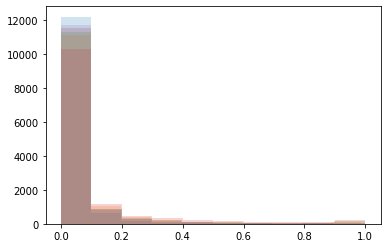

In [12]:
# Histogram of the PP_H4 values
diseases = coloc.columns[1:-1]
for disease in diseases:
    plt.hist(coloc[disease], alpha = 0.2)
plt.show()

In [21]:
# Filter genes using threshold, save to csv
THRESHOLD = 0.1

for disease in diseases:
    print("Processing:     ", disease)
    coloc_filtered = coloc[coloc[disease] > THRESHOLD]
    exp_filtered = exp[exp['NAME    ID'].isin(coloc_filtered["Gene"])]
    exp_filtered = exp_filtered.set_index('NAME    ID')
    
    print("Genes filtered: ", exp_filtered.shape[0])
    exp_filtered.to_csv(f'gene_exp_{disease}.gct.txt', sep='\t')

Processing:      alzheimers
Genes filtered:  1008
Processing:      asthma
Genes filtered:  2030
Processing:      coronaryatherosclerosis
Genes filtered:  1919
Processing:      hypertension
Genes filtered:  2890
Processing:      hernia
Genes filtered:  1508
Processing:      osteoarthrosis
Genes filtered:  1711


### After getting the filtered data from the above code, run in GSEA and extract gene set tsv files.

In [17]:
merged_df = pd.DataFrame()
for disease in diseases:
    df = pd.read_csv(f"gene_sets/gene_sets_{disease}.tsv", sep='\t')

    # Convert "AFTER RESTRICTING TO DATASET" column to numeric
    df['AFTER RESTRICTING TO DATASET'] = pd.to_numeric(df['AFTER RESTRICTING TO DATASET'], errors='coerce')

    # Combine the "AFTER RESTRICTING TO DATASET" and "STATUS" columns
    merged_df[disease] = df.apply(lambda row: row['AFTER RESTRICTING TO DATASET'] if pd.notnull(row['AFTER RESTRICTING TO DATASET']) else 0 if row['STATUS'] == 'Rejected!' else None, axis=1)

merged_df.insert(0, 'ORIGINAL SIZE', df['ORIGINAL SIZE'])
merged_df.insert(0, 'NAME', df['NAME'])
merged_df

,NAME,ORIGINAL SIZE,alzheimers,asthma,coronaryatherosclerosis,hypertension,hernia,osteoarthrosis
0,HALLMARK_ADIPOGENESIS,200,19.0,15.0,24.0,30.0,18.0,0.0
1,HALLMARK_ALLOGRAFT_REJECTION,200,0.0,25.0,24.0,35.0,0.0,0.0
2,HALLMARK_ANDROGEN_RESPONSE,101,0.0,0.0,0.0,0.0,0.0,0.0
3,HALLMARK_ANGIOGENESIS,36,0.0,0.0,0.0,0.0,0.0,0.0
4,HALLMARK_APICAL_JUNCTION,200,0.0,19.0,26.0,34.0,0.0,22.0
5,HALLMARK_APICAL_SURFACE,44,0.0,0.0,0.0,0.0,0.0,0.0
6,HALLMARK_APOPTOSIS,161,0.0,21.0,16.0,31.0,0.0,0.0
7,HALLMARK_BILE_ACID_METABOLISM,112,0.0,0.0,0.0,0.0,15.0,0.0
8,HALLMARK_CHOLESTEROL_HOMEOSTASIS,74,0.0,0.0,0.0,0.0,0.0,0.0
9,HALLMARK_COAGULATION,138,0.0,15.0,0.0,15.0,0.0,15.0


In [22]:
# Count the number of values greater than 0.0 for each row
row_counts = (merged_df.iloc[:, 1:] > 0).sum(axis=1)

# Filter rows based on which diseases meet the threshold
gene_sets_in_all_diseases = merged_df[row_counts > 6]["NAME"]
gene_sets_in_five_diseases = merged_df[row_counts > 5]["NAME"]

In [23]:
gene_sets_in_all_diseases

18    HALLMARK_GLYCOLYSIS
Name: NAME, dtype: object

In [24]:
gene_sets_in_five_diseases

0                HALLMARK_ADIPOGENESIS
10                 HALLMARK_COMPLEMENT
15     HALLMARK_ESTROGEN_RESPONSE_LATE
18                 HALLMARK_GLYCOLYSIS
22        HALLMARK_IL2_STAT5_SIGNALING
27          HALLMARK_KRAS_SIGNALING_DN
29            HALLMARK_MITOTIC_SPINDLE
30           HALLMARK_MTORC1_SIGNALING
36                HALLMARK_P53_PATHWAY
44    HALLMARK_TNFA_SIGNALING_VIA_NFKB
Name: NAME, dtype: object